In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make over monday - W42 - 2019:

The challenge in W42, we are going to analyze the data set of the Ironman World Championship Medalists. 

The Ironman World Championship is a race held annually in Hawaii, where the participants have to face 3 events: the Waikiki Roughwater Swim, the Around-Oahu Bike Race and the Honolulu Marathon. For more details about this race see [Ironman World Championship](https://en.wikipedia.org/wiki/Ironman_World_Championship).

Datasource: [Make Over Monday - w42 - 2019](https://www.makeovermonday.co.uk/data/)

In [2]:
# load the data
ironman = pd.read_csv('2019w42-QueryResult.csv')

# Data Analysis:

To understand the type of data in our datasets and the columns, we can see a summary of the dataset:

In [3]:
ironman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
year       252 non-null object
place      252 non-null object
athlete    252 non-null object
country    252 non-null object
time       252 non-null object
gender     252 non-null object
dtypes: object(6)
memory usage: 11.9+ KB


In [4]:
ironman.describe()

,year,place,athlete,country,time,gender
count,252,252,252,252,252,252
unique,43,3,105,16,247,2
top,1993,Gold,Paula Newby-Fraser,USA,09:19:13,Male
freq,6,85,10,81,2,129


Data Summary:
* 252 rows
* 5 columns:
    * year: the year of the championship race
    * place: indicates the position of the athletes, could be `Gold, Silver, Bronze`
    * athlete: the name of the individual
    * country: nation of the individual
    * time: race time
    * gender: of the athlete


In [5]:
ironman.head()

,year,place,athlete,country,time,gender
0,2019,Gold,Jan Frodeno,GER,07:51:13,Male
1,2018,Gold,Patrick Lange,GER,07:52:39,Male
2,2017,Gold,Patrick Lange,GER,08:01:40,Male
3,2016,Gold,Jan Frodeno,GER,08:06:30,Male
4,2015,Gold,Jan Frodeno,GER,08:14:40,Male


# Data Preparation


In [6]:
ironman['time']=pd.to_datetime(ironman['time'], format = '%H:%M:%S').dt.time

In [7]:
# Create an index for the years, since it contains string data
unique_years = ironman.year.sort_values().unique()
num_years = unique_years.size
year_idx = range(0, num_years)
year_idx_dic = {unique_years[idx]: idx for idx in year_idx}
ironman['year_idx'] = ironman['year'].map(year_idx_dic)
ironman.head()

,year,place,athlete,country,time,gender,year_idx
0,2019,Gold,Jan Frodeno,GER,07:51:13,Male,42
1,2018,Gold,Patrick Lange,GER,07:52:39,Male,41
2,2017,Gold,Patrick Lange,GER,08:01:40,Male,40
3,2016,Gold,Jan Frodeno,GER,08:06:30,Male,39
4,2015,Gold,Jan Frodeno,GER,08:14:40,Male,38


# Data Summary:

## Total number of races

In [8]:
num_races = ironman.year.unique().size
num_nations = ironman.country.unique().size
num_athletes = ironman.athlete.unique().size

print("Since 1978, there have been {} races".format(num_races))
print("where a total of {} nations have participated".format(num_nations))
print("with a total of {} different athletes".format(num_athletes))

Since 1978, there have been 43 races
where a total of 16 nations have participated
with a total of 105 different athletes


## Athletes per country and gender

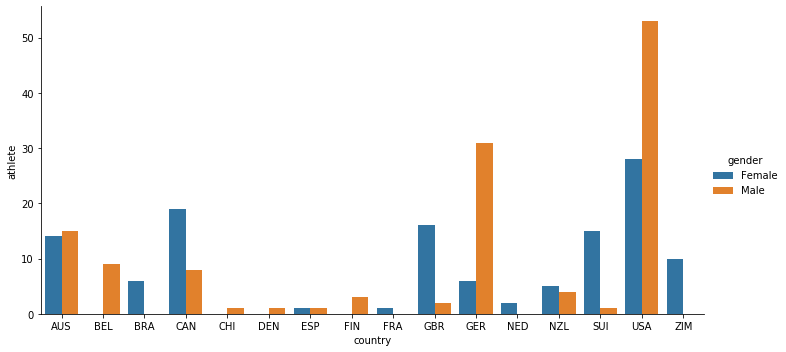

In [9]:
athletes_country_gender = ironman.groupby(['country', 'gender']).count()
athletes_country_gender.reset_index(inplace = True)

ax = sns.catplot(x = 'country', y = 'athlete', hue = 'gender', data = athletes_country_gender, kind = 'bar', height=5, aspect=2)


# Insights

* USA is the country with more participants (both men and women)
* BRA, FRA, NED and ZIM have only women. While BEL, CHI, DEN and FIN have only men.

In [26]:
man_num_medals = ironman[ironman['gender'] == 'Male'].groupby('athlete').count().sort_values('year',ascending = False)

list_men = man_num_medals['place'].nlargest(10).index


In [16]:
woman_num_medals = ironman[ironman['gender'] == 'Female'].groupby('athlete').count()

list_women = woman_num_medals['place'].nlargest(10).index

Text(0.5, 1.0, 'Top 10 Male Athletes')

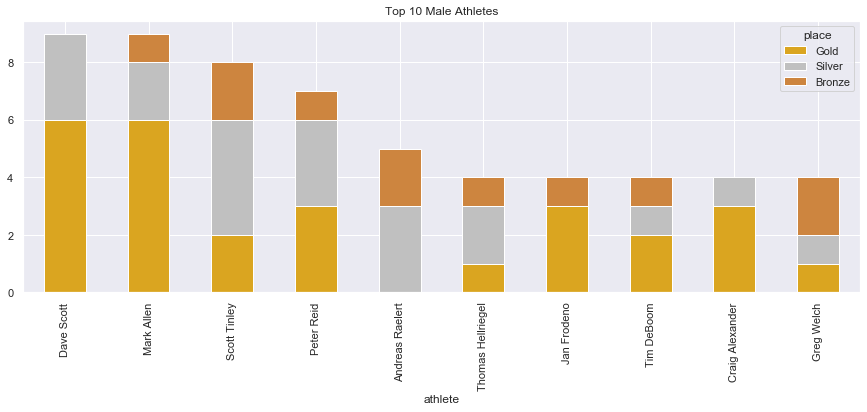

In [46]:
medals_athletes_male = ironman[ironman['athlete'] \
                               .isin(list_men)] \
                                .groupby(['place','athlete'])['year'] \
                                .count()
                                
medals_athletes_male.head()
medals_athletes_male = medals_athletes_male.reindex(index=list_men, level=1)
medals_athletes_male = medals_athletes_male.reindex(index=['Gold', 'Silver','Bronze'], level=0)

sns.set()
ax = medals_athletes_male.unstack(0).plot.bar(stacked = True, figsize = (15,5), color=['goldenrod','silver','peru'])
ax.set_title('Top 10 Male Athletes')


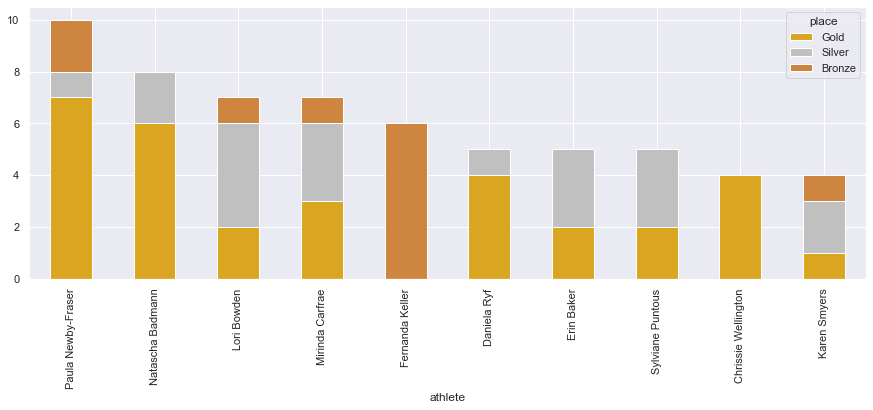

In [54]:
medals_athlete_female = ironman[ironman['gender'] == 'Female'].groupby(['place', 'athlete'])['year'].count()
medals_athlete_female = medals_athlete_female.reindex(index = list_women, level = 1)
medals_athlete_female = medals_athlete_female.reindex(index = ['Gold','Silver','Bronze'], level = 0)
medals_athlete_female.unstack(0).plot.bar(stacked = True, figsize = (15,5), color = ['goldenrod','silver','peru'])

# Have athletes improved their times over the Years?

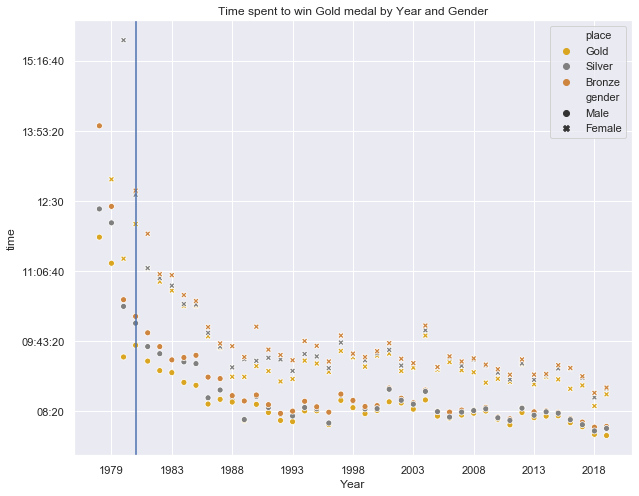

In [61]:
# Plot the time spent for the Gold winners per Year
athletes_w_gold = ironman[ironman['place']=='Gold']
plt.subplots(figsize = (10,8))
ax = sns.scatterplot(x = 'year_idx', y = 'time', hue = 'place', style = 'gender', data = ironman, palette = ['goldenrod', 'gray','peru'])
ax.set_title('Time spent to win Gold medal by Year and Gender')
ax.set_xticks(year_idx[1::5])
ax.set_xticklabels(unique_years[1::5])
ax.set_xlabel('Year')

# Superimpose a time to indicate when the conditions of the race changed
plt.axvline(x=year_idx_dic['1981'])

# Insights:
The athletes have improved their time over the years:
* One importat cause is the reduction of the course lenght. In 1981, the race was reduced by 5 km.
* But also, after that year, the athletes completed the race faster. During the years, better training sections and better materials ( bikes and swimming suits) have made the challenge a little bit easier.
